Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS


Read Data

In [2]:
london_crime=pd.read_csv("../dataset/london_crime.csv")

10 Data Teratas

In [3]:
london_crime.head(10)

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   
5  E01001320      Ealing           Theft and Handling   
6  E01001342      Ealing  Violence Against the Person   
7  E01002633    Hounslow                      Robbery   
8  E01003496      Newham              Criminal Damage   
9  E01004177      Sutton           Theft and Handling   

                      minor_category  value  year  month  
0        Burglary in Other Buildings      0  2016     11  
1                     Other violence      0  2016     11  
2                     Other violence      0  2015      5  
3        Burglary in Other Buildings      0  2016      3  
4                  Personal Property      0  2008      6  
5                        Other Theft      0  2012      5  
6                   Offensive Weapon      0  2010      7  
7                  Personal Property      0  2013      4  
8  Criminal Damage To Other Building      0  2013      9  
9        Theft/Taking of Pedal Cycle      1  2016      8

10 Data Terbawah

In [4]:
london_crime.tail(10)

lsoa_code     borough               major_category  \
13490594  E01001706   Greenwich              Criminal Damage   
13490595  E01001144     Croydon  Violence Against the Person   
13490596  E01000655     Bromley           Theft and Handling   
13490597  E01000588       Brent           Theft and Handling   
13490598  E01032577  Hillingdon           Theft and Handling   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                             minor_category  value  year  month  
13490594  Criminal Damage To Other Building      0  2008      2  
13490595                         Harassment      0  2012      1  
13490596                   Theft From Shops      0  2010      7  
13490597        Theft/Taking of Pedal Cycle      0  2014     10  
13490598                        Other Theft      0  2012      2  
13490599        Criminal Damage To Dwelling      0  2015      2  
13490600                  Personal Property      1  2015      6  
13490601             Burglary in a Dwelling      0  2011      2  
13490602                  Business Property      0  2011      5  
13490603                       Wounding/GBH      0  2015      6

Informasi dari data

In [5]:
london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Melihat Dimensi

In [6]:
london_crime.shape

(13490604, 7)

In [7]:
#hapus colom lsoa_code
df_london_crime=london_crime.drop(['lsoa_code'], axis=1)
df_london_crime

borough               major_category  \
0            Croydon                     Burglary   
1          Greenwich  Violence Against the Person   
2            Bromley  Violence Against the Person   
3          Redbridge                     Burglary   
4         Wandsworth                      Robbery   
...              ...                          ...   
13490599       Brent              Criminal Damage   
13490600  Hillingdon                      Robbery   
13490601      Sutton                     Burglary   
13490602     Croydon                      Robbery   
13490603      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                      Other violence      0  2015      5  
3         Burglary in Other Buildings      0  2016      3  
4                   Personal Property      0  2008      6  
...                               ...    ...   ...    ...  
13490599  Criminal Damage To Dwelling      0  2015      2  
13490600            Personal Property      1  2015      6  
13490601       Burglary in a Dwelling      0  2011      2  
13490602            Business Property      0  2011      5  
13490603                 Wounding/GBH      0  2015      6  

[13490604 rows x 6 columns]

In [8]:
#mengganti nama colom borough menjadi city
df_london_crime.rename(columns={"borough":"city"}, inplace=True)

In [9]:
#melihat jumlah data yang kosong 
df_london_crime.isnull().sum()

city              0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [10]:
#set index city
df_london_crime.set_index("city", inplace=True)

In [11]:
#melihat kota brent
Brent=df_london_crime.loc["Brent","value"]
Brent

city
Brent    0
Brent    0
Brent    0
Brent    0
Brent    0
        ..
Brent    0
Brent    0
Brent    0
Brent    0
Brent    0
Name: value, Length: 490644, dtype: int64

<AxesSubplot:xlabel='city'>

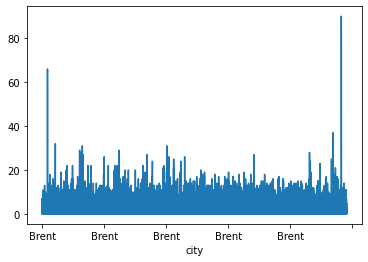

In [12]:
Brent.plot()

<AxesSubplot:ylabel='Frequency'>

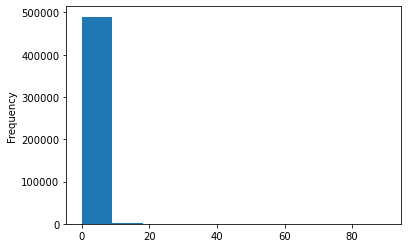

In [13]:
Brent.plot(kind='hist')

5 kota teratas paling banyak kejahatan

In [14]:
df_top5=df_london_crime['value'].head()
df_top5

city
Croydon       0
Greenwich     0
Bromley       0
Redbridge     0
Wandsworth    0
Name: value, dtype: int64

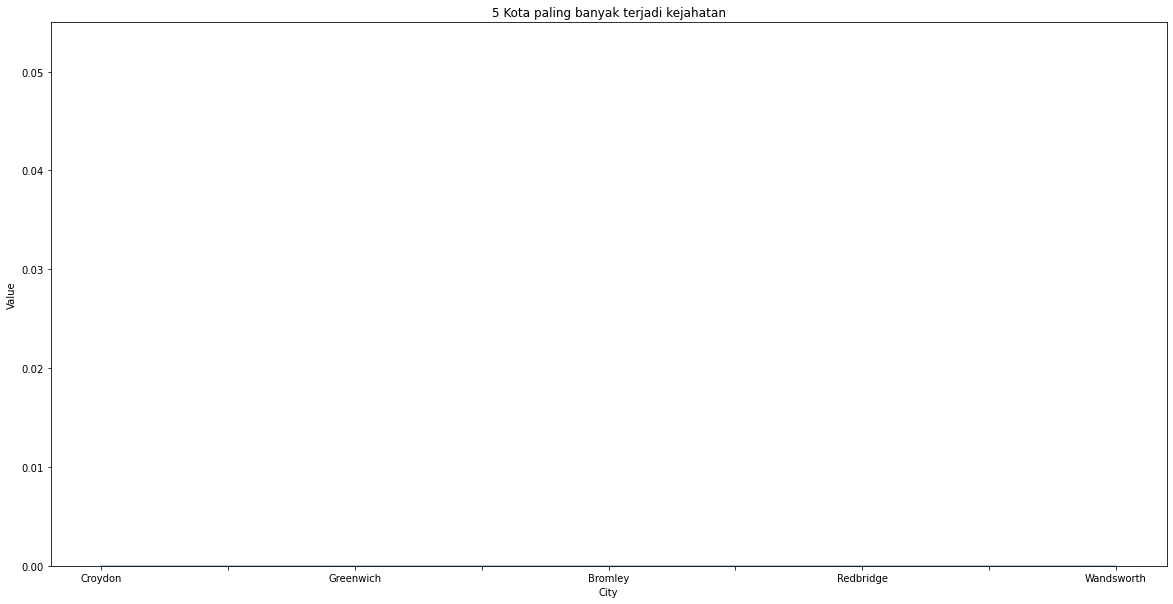

In [15]:
df_top5.plot(kind='area', figsize=(20,10), stacked=False)
plt.title("5 Kota paling banyak terjadi kejahatan")
plt.xlabel("City")
plt.ylabel("Value")
plt.show()

Kesimpulan : Berdasarkan grafik diatas kota yang paling bayak terjadi kejahatan adalah Tower hamlets

In [16]:
#membandingkan kota Brent dan Greenwich
brent_greenwich=df_london_crime.loc[['Brent','Greenwich']]

<AxesSubplot:xlabel='city'>

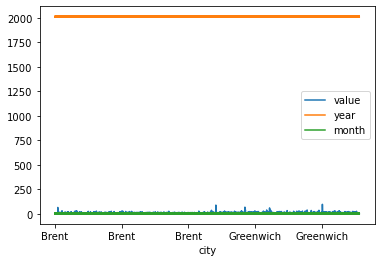

In [17]:
brent_greenwich.plot(kind='line')

<AxesSubplot:xlabel='city'>

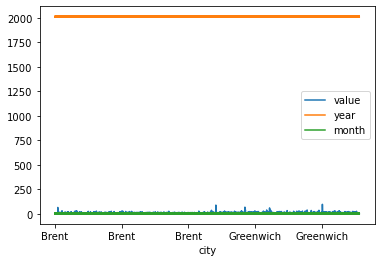

In [18]:
brent_greenwich.plot()

Jumlah Kejahatan Di Kota

In [19]:
df_sort_value=df_london_crime.sort_values(['value'],ascending=False, axis=0, inplace=True)

In [20]:
df_group=df_london_crime.groupby('city',axis=0).sum()

In [21]:
df_group.head()

value        year    month
city                                             
Barking and Dagenham  149447   625812480  2021760
Barnet                212191  1152537984  3723408
Bexley                114136   775964016  2506842
Brent                 227551   987175728  3189186
Bromley               184349  1054102896  3405402

Text(0.5, 1.0, 'Jumlah kejahatan di kota london')

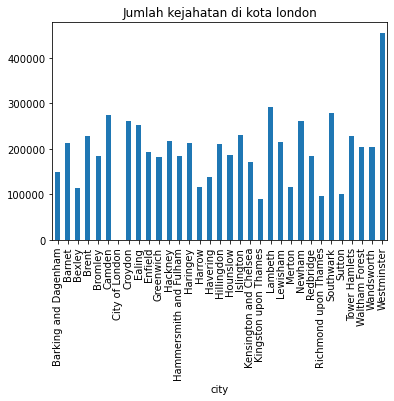

In [22]:
df_group['value'].plot(kind='bar')
plt.title("Jumlah kejahatan di kota london")

Kesimpulan :
    Berdasarkan grafik di atas dapat disimpulkan bahwa wilayah Westminster merupakan wilayah yang paling banyak terjadi kejahatan

In [23]:
#pie chart
city=df_london_crime.groupby('city',axis=0).sum()
city

value        year    month
city                                               
Barking and Dagenham    149447   625812480  2021760
Barnet                  212191  1152537984  3723408
Bexley                  114136   775964016  2506842
Brent                   227551   987175728  3189186
Bromley                 184349  1054102896  3405402
Camden                  275147   761405184  2459808
City of London             780    19556640    63180
Croydon                 260294  1211425200  3913650
Ealing                  251562  1105384752  3571074
Enfield                 193880  1028461968  3322566
Greenwich               181568   847454400  2737800
Hackney                 217119   840500928  2715336
Hammersmith and Fulham  185259   661449024  2136888
Haringey                213272   832678272  2690064
Harrow                  116848   735764256  2376972
Havering                138947   803995200  2597400
Hillingdon              209680   890479008  2876796
Hounslow                186772   796607136  2573532
Islington               230286   722726496  2334852
Kensington and Chelsea  171981   597129408  1929096
Kingston upon Thames     89306   522162288  1686906
Lambeth                 292178  1044324576  3373812
Lewisham                215137   976093632  3153384
Merton                  115654   683830512  2209194
Newham                  262024   948497040  3064230
Redbridge               183562   896780592  2897154
Richmond upon Thames     96771   611905536  1976832
Southwark               278809   972399600  3141450
Sutton                  100987   648845856  2096172
Tower Hamlets           228613   829201536  2678832
Waltham Forest          203879   817467552  2640924
Wandsworth              204741  1003255632  3241134
Westminster             455028   737719920  2383290

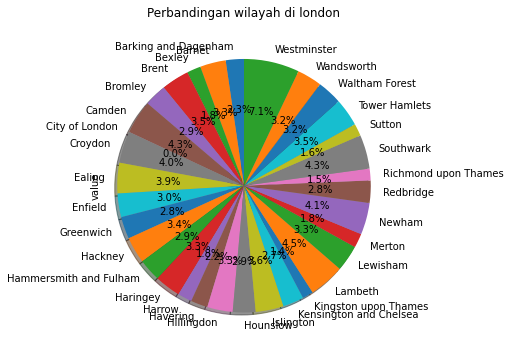

In [24]:
city['value'].plot(kind='pie', figsize=(5,6), autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Perbandingan wilayah di london")
plt.axis('equal')
plt.show()

Kesimpulan : Berdasarkan grafik diatas dapat disimpulkan bahwa wilayah terbanyak terjadi kejahatan yaitu Westminster dengan total 7,1%

In [25]:
df_Greenwich=df_london_crime.loc['Greenwich','value']
df_Greenwich.head()

city
Greenwich    98
Greenwich    69
Greenwich    61
Greenwich    42
Greenwich    40
Name: value, dtype: int64

<AxesSubplot:>

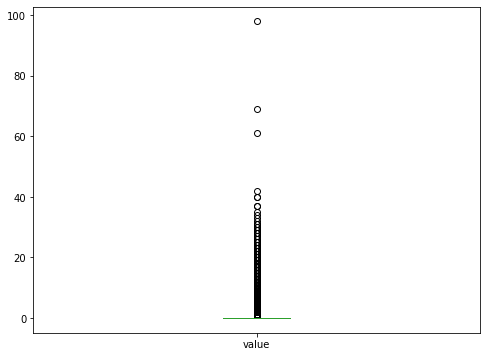

In [26]:
#visualisasi box
df_Greenwich.plot(kind='box', figsize=(8,6))

In [27]:
df_Ealing=df_london_crime.loc["Ealing","value"]
df_Ealing

city
Ealing    51
Ealing    44
Ealing    43
Ealing    42
Ealing    41
          ..
Ealing     0
Ealing     0
Ealing     0
Ealing     0
Ealing     0
Name: value, Length: 549396, dtype: int64

Melihat kota yang paling banyak terjadi tindak kejahatan

In [ ]:
word_string=' '.join(london_crime['borough'])
word_string

In [ ]:
stopwords=set(STOPWORDS)
london_crime_wc=WordCloud(
background_color='white',
max_words=20000,
stopwords=stopwords)

In [30]:
london_crime_wc.generate(word_string)

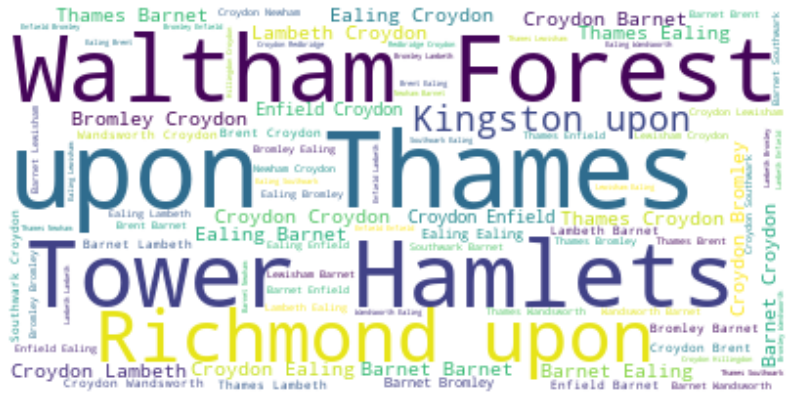

In [31]:
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(london_crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()